
# Part 1-A

Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

Which states have been growing consistently fast, and which ones have been struggling?

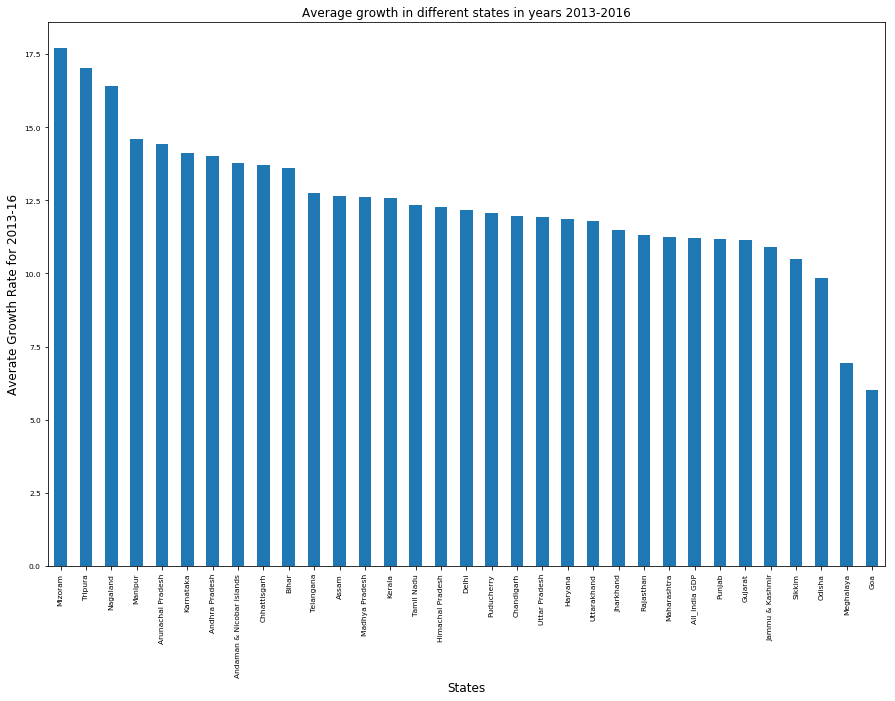

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
#file path
path = ''
#reading input file
df = pd.read_csv(path+"GSDP_States_UN.csv")

#striping columns for spaces.
df.columns= df.columns.str.strip()

# finding missing values in the each column
df.isnull().sum()
df= df.drop(columns = 'West Bengal1')

#removing required rows from the initial dataset.
df=df.loc[(df['Duration'] != '2016-17') ]

#print(df.shape)
df_1= df.drop(columns = 'All_India GDP')

#filtering the not requried data and doing group by 
df_1 = df[(df['Duration'] != '2012-13') & (df['Items  Description'] != "GSDP - CURRENT PRICES (` in Crore)")].groupby('Items  Description')

#Assumption -- considering the NA as same as the mean of the remaining years and not filling with zeros.
df_1 = df_1.mean().round(2)
df_1=df_1.transpose()
#print(df_1.head(33))
df_1=df_1.sort_values(by='(% Growth over previous year)',ascending =False)

#plotting
ax = df_1.plot(kind='bar', title ="Average growth in different states in years 2013-2016",figsize=(15,10),legend=False, fontsize=7.5)
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("Averate Growth Rate for 2013-16",fontsize=12)
plt.show()
#plt.savefig('Average_growth_rate.jpeg')





# Home State Vs All_India_GDP

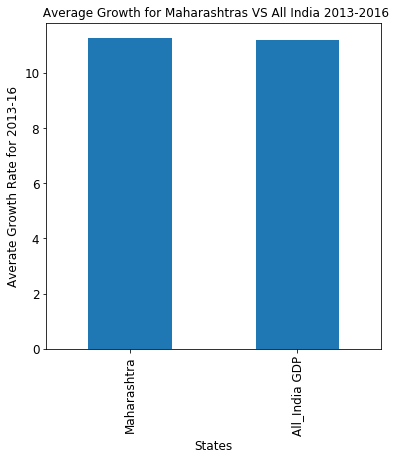

In [46]:
## State VS All India

#Preparing the data
df_2 = df[['Items  Description','Duration','Maharashtra','All_India GDP']]
df_2 = df_2[(df_2['Duration'] != '2012-13') & (df_2['Items  Description'] != "GSDP - CURRENT PRICES (` in Crore)")].groupby('Items  Description')

#Calculate the Average vs Rounding the data
df_2 = df_2.mean().round(2)
df_2=df_2.transpose()

df_2=df_2.sort_values(by='(% Growth over previous year)',ascending =False)

#Plotting Graph
ax = df_2.plot(kind='bar', title =" Average Growth for Maharashtras VS All India 2013-2016",figsize=(6,6),legend=False, fontsize=12)
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("Averate Growth Rate for 2013-16",fontsize=12)
plt.show()
#plt.savefig('Maharashtra_VS_ALL_India.jpeg')



# Plot the total GDP of the states for the year 2015-16

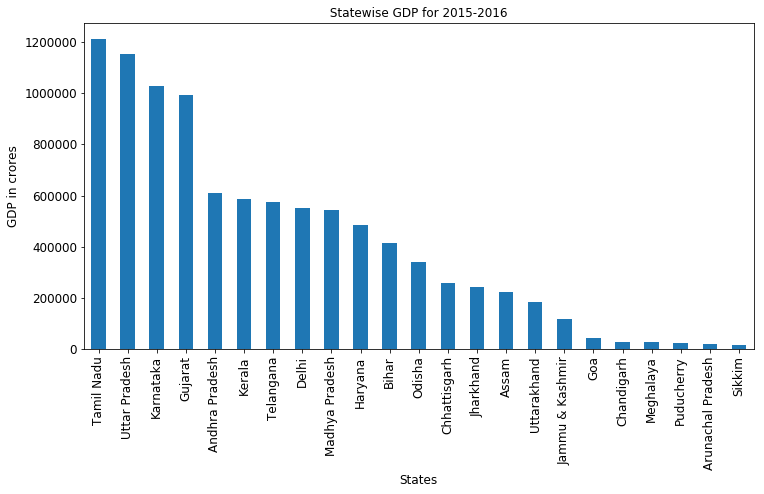

In [47]:
##Identify the top 5 and the bottom 5 states based on total GDP
df_3= df[(df['Duration'] == '2015-16') & (df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)")]
df_3= df_3.dropna(axis='columns')
#dropping colums not having data
df_3= df_3.drop(columns = ['All_India GDP','Duration'])

df_3=df_3.transpose()

df_3=df_3.rename(columns=df_3.iloc[0]).drop(df_3.index[0])
#sorting data
df_3=df_3.sort_values(by="GSDP - CURRENT PRICES (` in Crore)",ascending =False)
#assuming data not present is not colleacted rather than zero GDP
ax = df_3.plot(kind='bar', title =" Statewise GDP for 2015-2016 ",figsize=(12,6),legend=False, fontsize=12)
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("GDP in crores",fontsize=12)
plt.show()
#plt.savefig("States GDP for 2015-16")

# Part I-B

C:\Users\jignesh.v.patel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


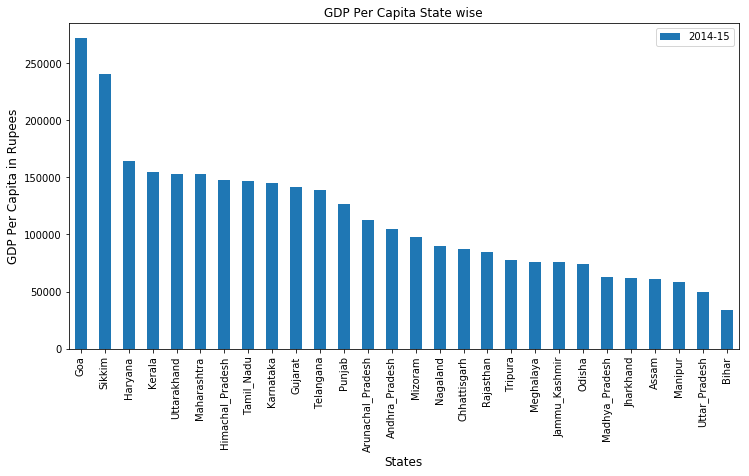

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

#initializing Dataframe
final_df = pd.DataFrame()

#Reading Multiple files and adding state columns to it.
for file in os.listdir('C:/Users/jignesh.v.patel/OneDrive - Accenture/My/Study/Upgrade/Notes/Stats and EDA/Data/Assignment_data/part2'):
    if file.endswith('.csv'):
        df = pd.read_csv('C:/Users/jignesh.v.patel/OneDrive - Accenture/My/Study/Upgrade/Notes/Stats and EDA/Data/Assignment_data/part2/'+file,encoding ='ISO-8859-1')
        df['State'] = file.split('-')[1]
        final_df = final_df.append(df, ignore_index=True)
        
#Keeping required columns
df_state_year = final_df[['State','S.No.','Item','2014-15']]

#keeping required data
df_gdp_per_capita = df_state_year[df_state_year['Item'] == 'Per Capita GSDP (Rs.)']
df_gdp_per_capita = df_gdp_per_capita[['State','2014-15']].sort_values(by="2014-15",ascending =False)

#Graph Plotting
ax=df_gdp_per_capita.plot(kind='bar',x= 'State' ,y = '2014-15' ,title ='GDP Per Capita State wise',figsize=(12,6))
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("GDP Per Capita in Rupees",fontsize=12)
plt.show()


# Ratio for the Highest to the Smallest GDP per Capita

In [23]:
highest = df_gdp_per_capita['2014-15'].max()
lowest = df_gdp_per_capita['2014-15'].min()


ratio_1 = round(highest/lowest)
print("The Highest GDP per capita is nearly 8 times of lowest GRP per Capita")
print("Actual Ratio values is",ratio_1)

The Highest GDP per capita is nearly 8 times of lowest GRP per Capita
Actual Ratio values is 8.0


# Percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

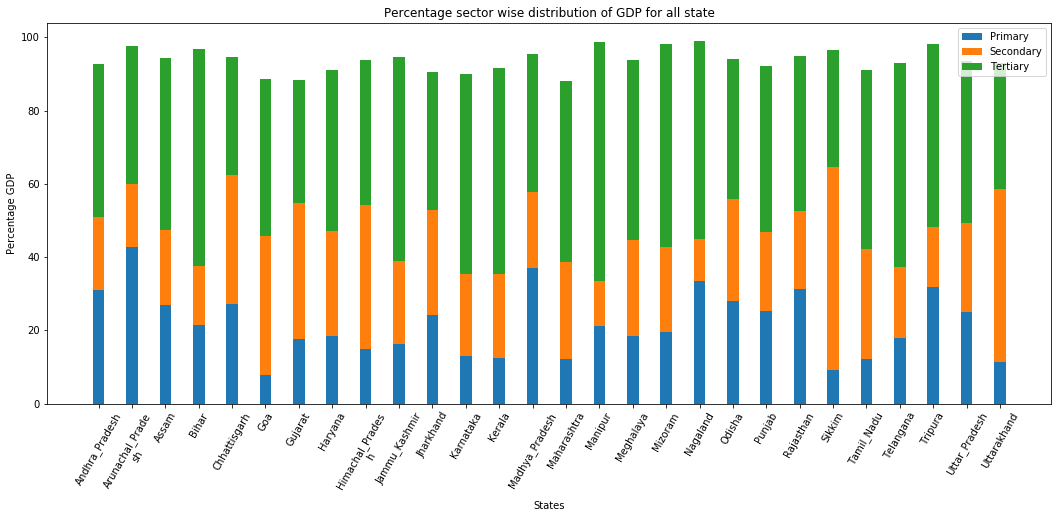

In [24]:
import numpy as np
from textwrap import wrap
sector_grp= df_state_year[(df_state_year['Item'] == 'Primary') | (df_state_year['Item'] == 'Secondary') | (df_state_year['Item'] == 'Tertiary')|(df_state_year['Item'] == 'Gross State Domestic Product')]

#remove unwanted columns
sector_grp=sector_grp.drop(columns = 'S.No.')

#applying pivot table
sector_grp=sector_grp.pivot(index='State', columns='Item', values='2014-15')

sector_grp=sector_grp.reset_index()

#getting percentage contribution for each sector
sector_grp["Primary_Percent"] = round((sector_grp['Primary']/sector_grp['Gross State Domestic Product'])*100,2)
sector_grp["Secondary_Percent"] = round((sector_grp['Secondary']/sector_grp['Gross State Domestic Product'])*100,2)
sector_grp["Tertiary_Percent"] = round((sector_grp['Tertiary']/sector_grp['Gross State Domestic Product'])*100,2)
sector_grp["remaining"] = 100-(sector_grp.Primary_Percent+sector_grp.Secondary_Percent+sector_grp.Tertiary_Percent)

#Plotting stacked bar
states = sector_grp.iloc[:, 0]
primary_per = sector_grp.iloc[:,5]
secondary_per= sector_grp.iloc[:,6]
tertiary_per = sector_grp.iloc[:,7]
indx = np.arange(len(sector_grp))

plt.figure(figsize=(18,7))
barWidth = 0.35
graph_prim = plt.bar(x=indx, height=primary_per, width=barWidth)
graph_sec = plt.bar(x=indx, height=secondary_per,width=barWidth, bottom=primary_per)
graph_terti = plt.bar(x=indx, height=tertiary_per,width=barWidth, bottom=secondary_per+primary_per)

plt.xlabel('States')
plt.ylabel('Percentage GDP')
plt.legend((graph_prim[0], graph_sec[0],graph_terti[0]), ('Primary', 'Secondary','Tertiary'))
states = ['\n'.join(wrap(state, 15)) for state in states]
plt.xticks(indx, states,rotation=60)
plt.title('Percentage sector wise distribution of GDP for all state')
plt.show()


# Plot the contribution of the sub-sectors as a percentage of the GSDP of each category

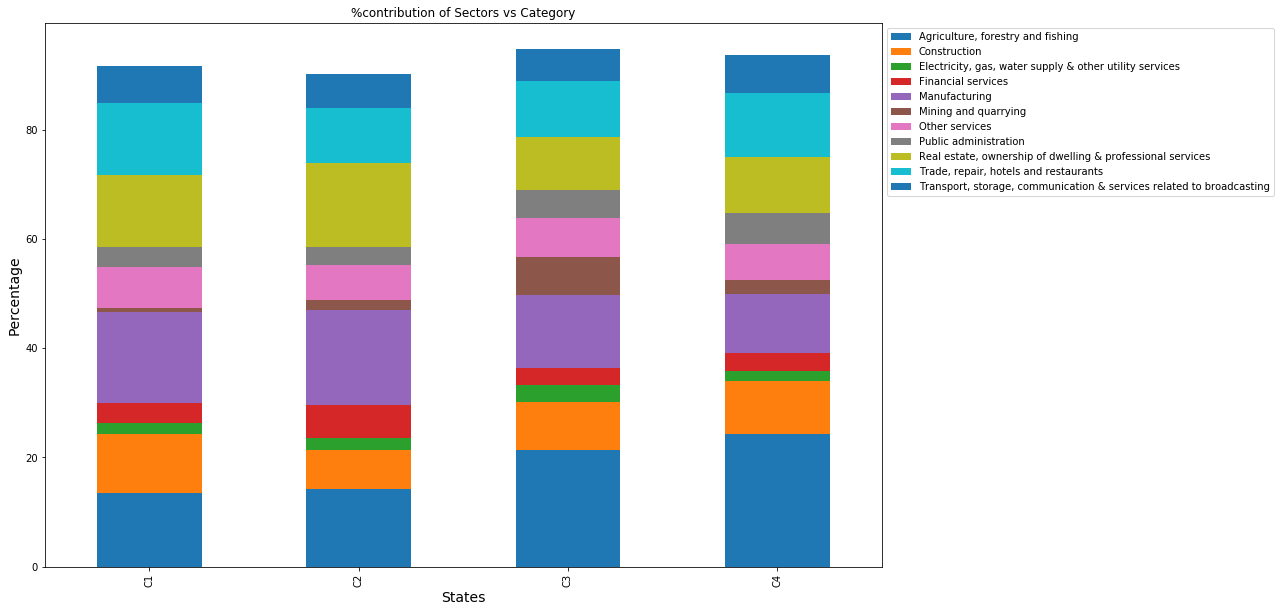

In [27]:
pd.set_option('display.max_columns', 10000)

#df_cat_gdp_per_capita= df_state_year[(df_state_year['Item'] == 'Primary') | (df_state_year['Item'] == 'Secondary') | (df_state_year['Item'] == 'Tertiary')|(df_state_year['Item'] == 'Gross State Domestic Product')]

#getting quantile values
quat_2=df_gdp_per_capita.quantile(q=0.2, axis=0, numeric_only=True, interpolation='linear')[0]
quat_5=df_gdp_per_capita.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')[0]
quat_85=df_gdp_per_capita.quantile(q=0.85, axis=0, numeric_only=True, interpolation='linear')[0]
quat_1=df_gdp_per_capita.quantile(q=1, axis=0, numeric_only=True, interpolation='linear')[0]

#renaming column 
df_gdp_per_capita=df_gdp_per_capita.rename(columns = {"2014-15":"GDP_Per_Capita"})

#function to find category
def cat(x):
    if x>quat_85:
        return "C1"
    elif x > quat_5:
        return "C2"
    elif x > quat_2:
        return "C3"
    else:
        return 'C4'

#applying categories to the dataframe
df_gdp_per_capita["Category"] = df_gdp_per_capita['GDP_Per_Capita'].apply(cat)

#removing unwanted rows
fil_cols=['1','2','3','4','5','6','7','8','9','10','11','15']
df_state_year_filter = df_state_year.loc[df_state_year['S.No.'].isin(fil_cols),:]


#print(df_state_year_filter.shape)
#print(df_state_year.head())

#getting full data for each categories
df_final_cat_data = pd.merge(df_gdp_per_capita, df_state_year_filter, how='inner', on='State')
#print(df_final_cat_data.columns)

#removing unwanted columns
df_final_cat_data=df_final_cat_data.drop(columns = ['GDP_Per_Capita','State','S.No.'])

#calculating summation
df_final_cat_data_1 = df_final_cat_data.groupby(['Category','Item'])
df_final_cat_data_2=df_final_cat_data_1['2014-15'].sum().reset_index(name='Measure')

df_final_cat_data_3=df_final_cat_data_2.pivot(index='Category', columns='Item', values='Measure')

#arranging columns
GSDP = df_final_cat_data_3.pop('Gross State Domestic Product')
df_final_cat_data_3.insert(0, GSDP.name, GSDP)

df_final_cat_data_result = df_final_cat_data_3.iloc[:,1:].div(df_final_cat_data_3['Gross State Domestic Product'],axis=0).mul(100)


#plotting graph for each category
ax=df_final_cat_data_result.plot(kind='bar',stacked= True ,title ='%contribution of Sectors vs Category',figsize=(15,10))
ax.set_xlabel("States",fontsize=14)
ax.set_ylabel("Percentage",fontsize=14)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#Plotting co relation of the subsecotrs vs GDP

In [44]:

corr = df_final_cat_data_3.corr()
df_final_cat_data_3.head(4)
# plot the heatmap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Item,Gross State Domestic Product,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Manufacturing,Mining and quarrying,Other services,Public administration,"Real estate, ownership of dwelling & professional services","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
Category,,,,,,,,,,,,
C1,118129206.0,15993232.0,12607184.0,2434878.0,4321519.0,19625045.0,833510.0,9042352.0,4150701.0,15571552.0,15738265.0,7885253.0
C2,622828765.0,88427015.0,43975718.0,14541227.0,37812475.0,108002544.0,11613097.0,39486616.0,20189303.0,95695548.0,63729156.0,37760099.0
C3,135359991.0,28994177.0,11828535.0,4050466.0,4239374.0,18259272.0,9385092.0,9546854.0,7076156.0,13158791.0,13901840.0,7867052.0
C4,233252066.0,56735044.0,22632766.0,4282774.0,7654183.0,24937531.0,6096419.0,15541085.0,13189552.0,24018199.0,27221645.0,16082074.0


# Finding Top subsectors which are performing the 80% contribution to the category

In [385]:
## finding the top categories reaching the top 80 percent

dict1 =  dict()
for ele in df_final_cat_data_result.iterrows():
    c1 = df_final_cat_data_result.loc[ele[0]].sort_values(ascending=False)
    addition=0
    list1=list()
    i=0
    while(addition <= 80):
        addition = addition+c1.iat[i]
        list1.append(c1[c1 == c1.iat[i]].index[0])
        i= i+1
    dict1[ele[0]] =list1
    
print("Category having there top secors performing near to 80% are as follows \n" + str(dict1))
#print(list1)

Category having there top secors performing near to 80% are as follows 
{'C1': ['Manufacturing', 'Agriculture, forestry and fishing', 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services', 'Construction', 'Other services', 'Transport, storage, communication & services related to broadcasting'], 'C2': ['Manufacturing', 'Real estate, ownership of dwelling & professional services', 'Agriculture, forestry and fishing', 'Trade, repair, hotels and restaurants', 'Construction', 'Other services', 'Financial services', 'Transport, storage, communication & services related to broadcasting'], 'C3': ['Agriculture, forestry and fishing', 'Manufacturing', 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services', 'Construction', 'Other services', 'Mining and quarrying', 'Transport, storage, communication & services related to broadcasting'], 'C4': ['Agriculture, forestry and fishing', 'Trade, repair, hotels a

# Part2

C:\Users\jignesh.v.patel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


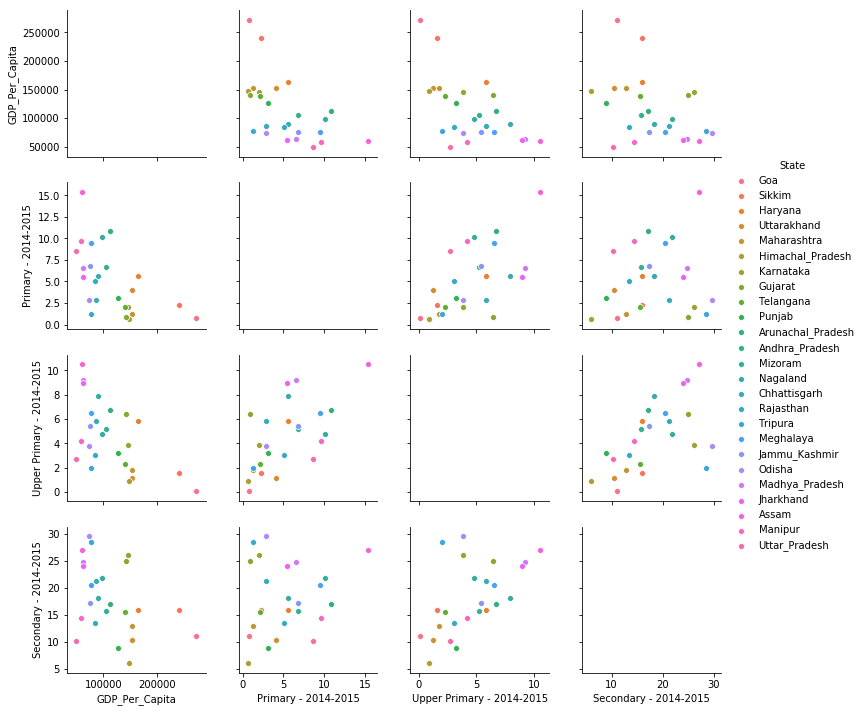

In [386]:

import seaborn as sns;

#Preparing dataframe
df_dropout_rate = pd.read_csv("C:/Users/jignesh.v.patel/OneDrive - Accenture/My/Study/Upgrade/Notes/Stats and EDA/Data/Assignment_data/State_Dropout.csv")

df_dropout_rate=df_dropout_rate.rename(columns= {'Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015','Level of Education - State':'State'})
df_dropout_rate_1 = df_dropout_rate.iloc[:,[1,4,7,10]]



#data cleaning
df_dropout_rate_1['State'] = df_dropout_rate_1['State'].apply(lambda x : x.replace(" ","_"))

df_dropout_rate_1 = df_dropout_rate_1.replace({'Uttrakhand':'Uttarakhand','Chhatisgarh':'Chhattisgarh','Jammu_and_Kashmir':'Jammu_Kashmir'})


df_final_drop_data = pd.merge(df_gdp_per_capita, df_dropout_rate_1, how='inner', on='State')      

df_final_drop_data= df_final_drop_data.drop(columns={'Category'})

#plotting Pair plot to see thetredn of drop out rates vs states
df_final_drop_data=df_final_drop_data.dropna()
g = sns.pairplot(df_final_drop_data,hue='State')
plt.savefig("Drop_out_rates.jpeg")
